<a href="https://colab.research.google.com/github/sinhamegha/TravelTideRewardProject/blob/main/Megha__Final_Project_travel_tide.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [155]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlalchemy as sa

In [156]:
# Corrected code to read the CSV file
customer  =pd.read_csv("User.csv", index_col="user_id")

In [157]:
customer.head()

,gender,age,married,has_children,home_country,median_page_clicks,num_sessions,median_session_duration_seconds,total_booked_trips,num_cancelled_trips,num_no_booking,num_not_completed_trips,num_completed_trips,num_round_trip_flights,num_one_way_flights,total_flights_booked,total_hotels_booked,median_flight_discount_amount,median_flight_base_price,median_flight_spent,median_hotel_spent,median_hotel_discount_amount,median_checked_bags,median_seats_booked,median_rooms,median_days_until_departure,median_days_until_checkin,median_days_stay_flight,median_night_stay_hotel,num_times_travelled_from_homeairport,num_times_travelled_to_homeairport,num_times_travelled_from_outside_homeairport,num_times_expensive_hotel_booked,num_times_expensive_flight_booked,num_weekend_trip,num_holiday_season_trip,avg_distance_flown
user_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
23557,F,65,True,False,usa,9.0,8,69.5,2,0,6,0,2.0,NaN,NaN,0.0,2.0,NaN,NaN,NaN,1835.25,0.25,NaN,NaN,1.5,NaN,12.815833,NaN,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
94883,F,52,True,False,usa,5.0,8,37.5,2,0,6,0,2.0,2.0,NaN,4.0,2.0,NaN,432.045,743.63,115.00,NaN,0.5,1.5,1.5,7.151759,7.310805,1.5,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1451.335404
101486,F,51,True,True,usa,19.5,8,146.0,2,0,6,0,2.0,1.0,NaN,2.0,2.0,NaN,189.910,189.91,1099.50,NaN,0.0,1.0,1.5,9.039838,7.904566,4.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,995.681600
101961,F,43,True,False,usa,18.0,8,133.0,5,0,3,0,5.0,5.0,NaN,10.0,5.0,0.1,129.900,129.90,504.00,NaN,0.0,1.0,1.0,5.762928,5.867106,5.0,4.0,5.0,0.0,0.0,0.0,0.0,0.0,1.0,1366.569097
106907,F,45,True,True,usa,19.0,8,143.5,1,1,6,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [158]:
customer.isna().sum()

gender                                             0
age                                                0
married                                            0
has_children                                       0
home_country                                       0
median_page_clicks                                 0
num_sessions                                       0
median_session_duration_seconds                    0
total_booked_trips                                 0
num_cancelled_trips                                0
num_no_booking                                     0
num_not_completed_trips                            0
num_completed_trips                              556
num_round_trip_flights                          1010
num_one_way_flights                             5452
total_flights_booked                             556
total_hotels_booked                              556
median_flight_discount_amount                   4036
median_flight_base_price                      

In [159]:
customer.shape


(5998, 37)

In [160]:
customer.fillna(0, inplace=True)

In [161]:
customer.isna().sum()

gender                                          0
age                                             0
married                                         0
has_children                                    0
home_country                                    0
median_page_clicks                              0
num_sessions                                    0
median_session_duration_seconds                 0
total_booked_trips                              0
num_cancelled_trips                             0
num_no_booking                                  0
num_not_completed_trips                         0
num_completed_trips                             0
num_round_trip_flights                          0
num_one_way_flights                             0
total_flights_booked                            0
total_hotels_booked                             0
median_flight_discount_amount                   0
median_flight_base_price                        0
median_flight_spent                             0


#Droping columns that are not useful for our analysis

In [86]:
customer.drop(columns=["num_times_expensive_flight_booked","num_times_expensive_hotel_booked","num_weekend_trip","num_holiday_season_trip","avg_distance_flown","num_times_travelled_from_homeairport"],inplace=True)

In [88]:
customer.drop(columns=["num_round_trip_flights","num_one_way_flights","median_session_duration_seconds","home_country","gender","num_round_trip_flights","num_one_way_flights","median_days_stay_flight","median_night_stay_hotel","num_times_travelled_to_homeairport","num_times_travelled_from_outside_homeairport"],inplace=True
              )

In [89]:
customer.drop(columns=["num_no_booking","num_not_completed_trips","median_days_until_checkin"],inplace=True)


In [90]:
customer.drop(columns=["median_flight_base_price"],inplace=True)

In [91]:
customer.shape

(5998, 18)

In [92]:
pd.set_option('display.max_columns', None)


In [93]:
customer.dtypes

age                                int64
married                             bool
has_children                        bool
median_page_clicks               float64
num_sessions                       int64
total_booked_trips                 int64
num_cancelled_trips                int64
num_completed_trips              float64
total_flights_booked             float64
total_hotels_booked              float64
median_flight_discount_amount    float64
median_flight_spent              float64
median_hotel_spent               float64
median_hotel_discount_amount     float64
median_checked_bags              float64
median_seats_booked              float64
median_rooms                     float64
median_days_until_departure      float64
dtype: object

In [94]:
customer.describe()

,age,median_page_clicks,num_sessions,total_booked_trips,num_cancelled_trips,num_completed_trips,total_flights_booked,total_hotels_booked,median_flight_discount_amount,median_flight_spent,median_hotel_spent,median_hotel_discount_amount,median_checked_bags,median_seats_booked,median_rooms,median_days_until_departure
count,5998.000000,5998.000000,5998.000000,5998.000000,5998.000000,5998.000000,5998.000000,5998.000000,5998.000000,5998.000000,5998.000000,5998.000000,5998.000000,5998.000000,5998.000000,5998.000000
mean,41.801267,13.594115,8.204568,2.684061,0.101701,2.582361,4.291097,2.316772,0.046082,482.043423,623.497216,0.033332,0.468073,0.942147,1.006836,9.895057
std,12.043409,5.422635,0.460911,1.521032,0.310444,1.533290,2.986260,1.456966,0.080900,1187.524620,866.480811,0.059624,0.518402,0.524444,0.481476,27.651360
min,17.000000,3.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,35.000000,9.500000,8.000000,2.000000,0.000000,1.000000,2.000000,1.000000,0.000000,160.758750,202.000000,0.000000,0.000000,1.000000,1.000000,5.624495
50%,42.000000,13.000000,8.000000,3.000000,0.000000,3.000000,4.000000,2.000000,0.000000,342.080000,391.500000,0.000000,0.500000,1.000000,1.000000,7.000854
75%,49.000000,17.500000,8.000000,4.000000,0.000000,4.000000,6.000000,3.000000,0.100000,512.363750,718.375000,0.050000,1.000000,1.000000,1.000000,8.403877
max,89.000000,93.000000,12.000000,8.000000,2.000000,8.000000,16.000000,8.000000,0.500000,36540.520000,14057.000000,0.450000,5.000000,6.000000,4.000000,365.076250


In [95]:
num_features =[el for el in customer.columns if el not in {"user_id","married","has_children"}]


In [96]:
num_features

['age',
 'median_page_clicks',
 'num_sessions',
 'total_booked_trips',
 'num_cancelled_trips',
 'num_completed_trips',
 'total_flights_booked',
 'total_hotels_booked',
 'median_flight_discount_amount',
 'median_flight_spent',
 'median_hotel_spent',
 'median_hotel_discount_amount',
 'median_checked_bags',
 'median_seats_booked',
 'median_rooms',
 'median_days_until_departure']

#Univariate Analysis

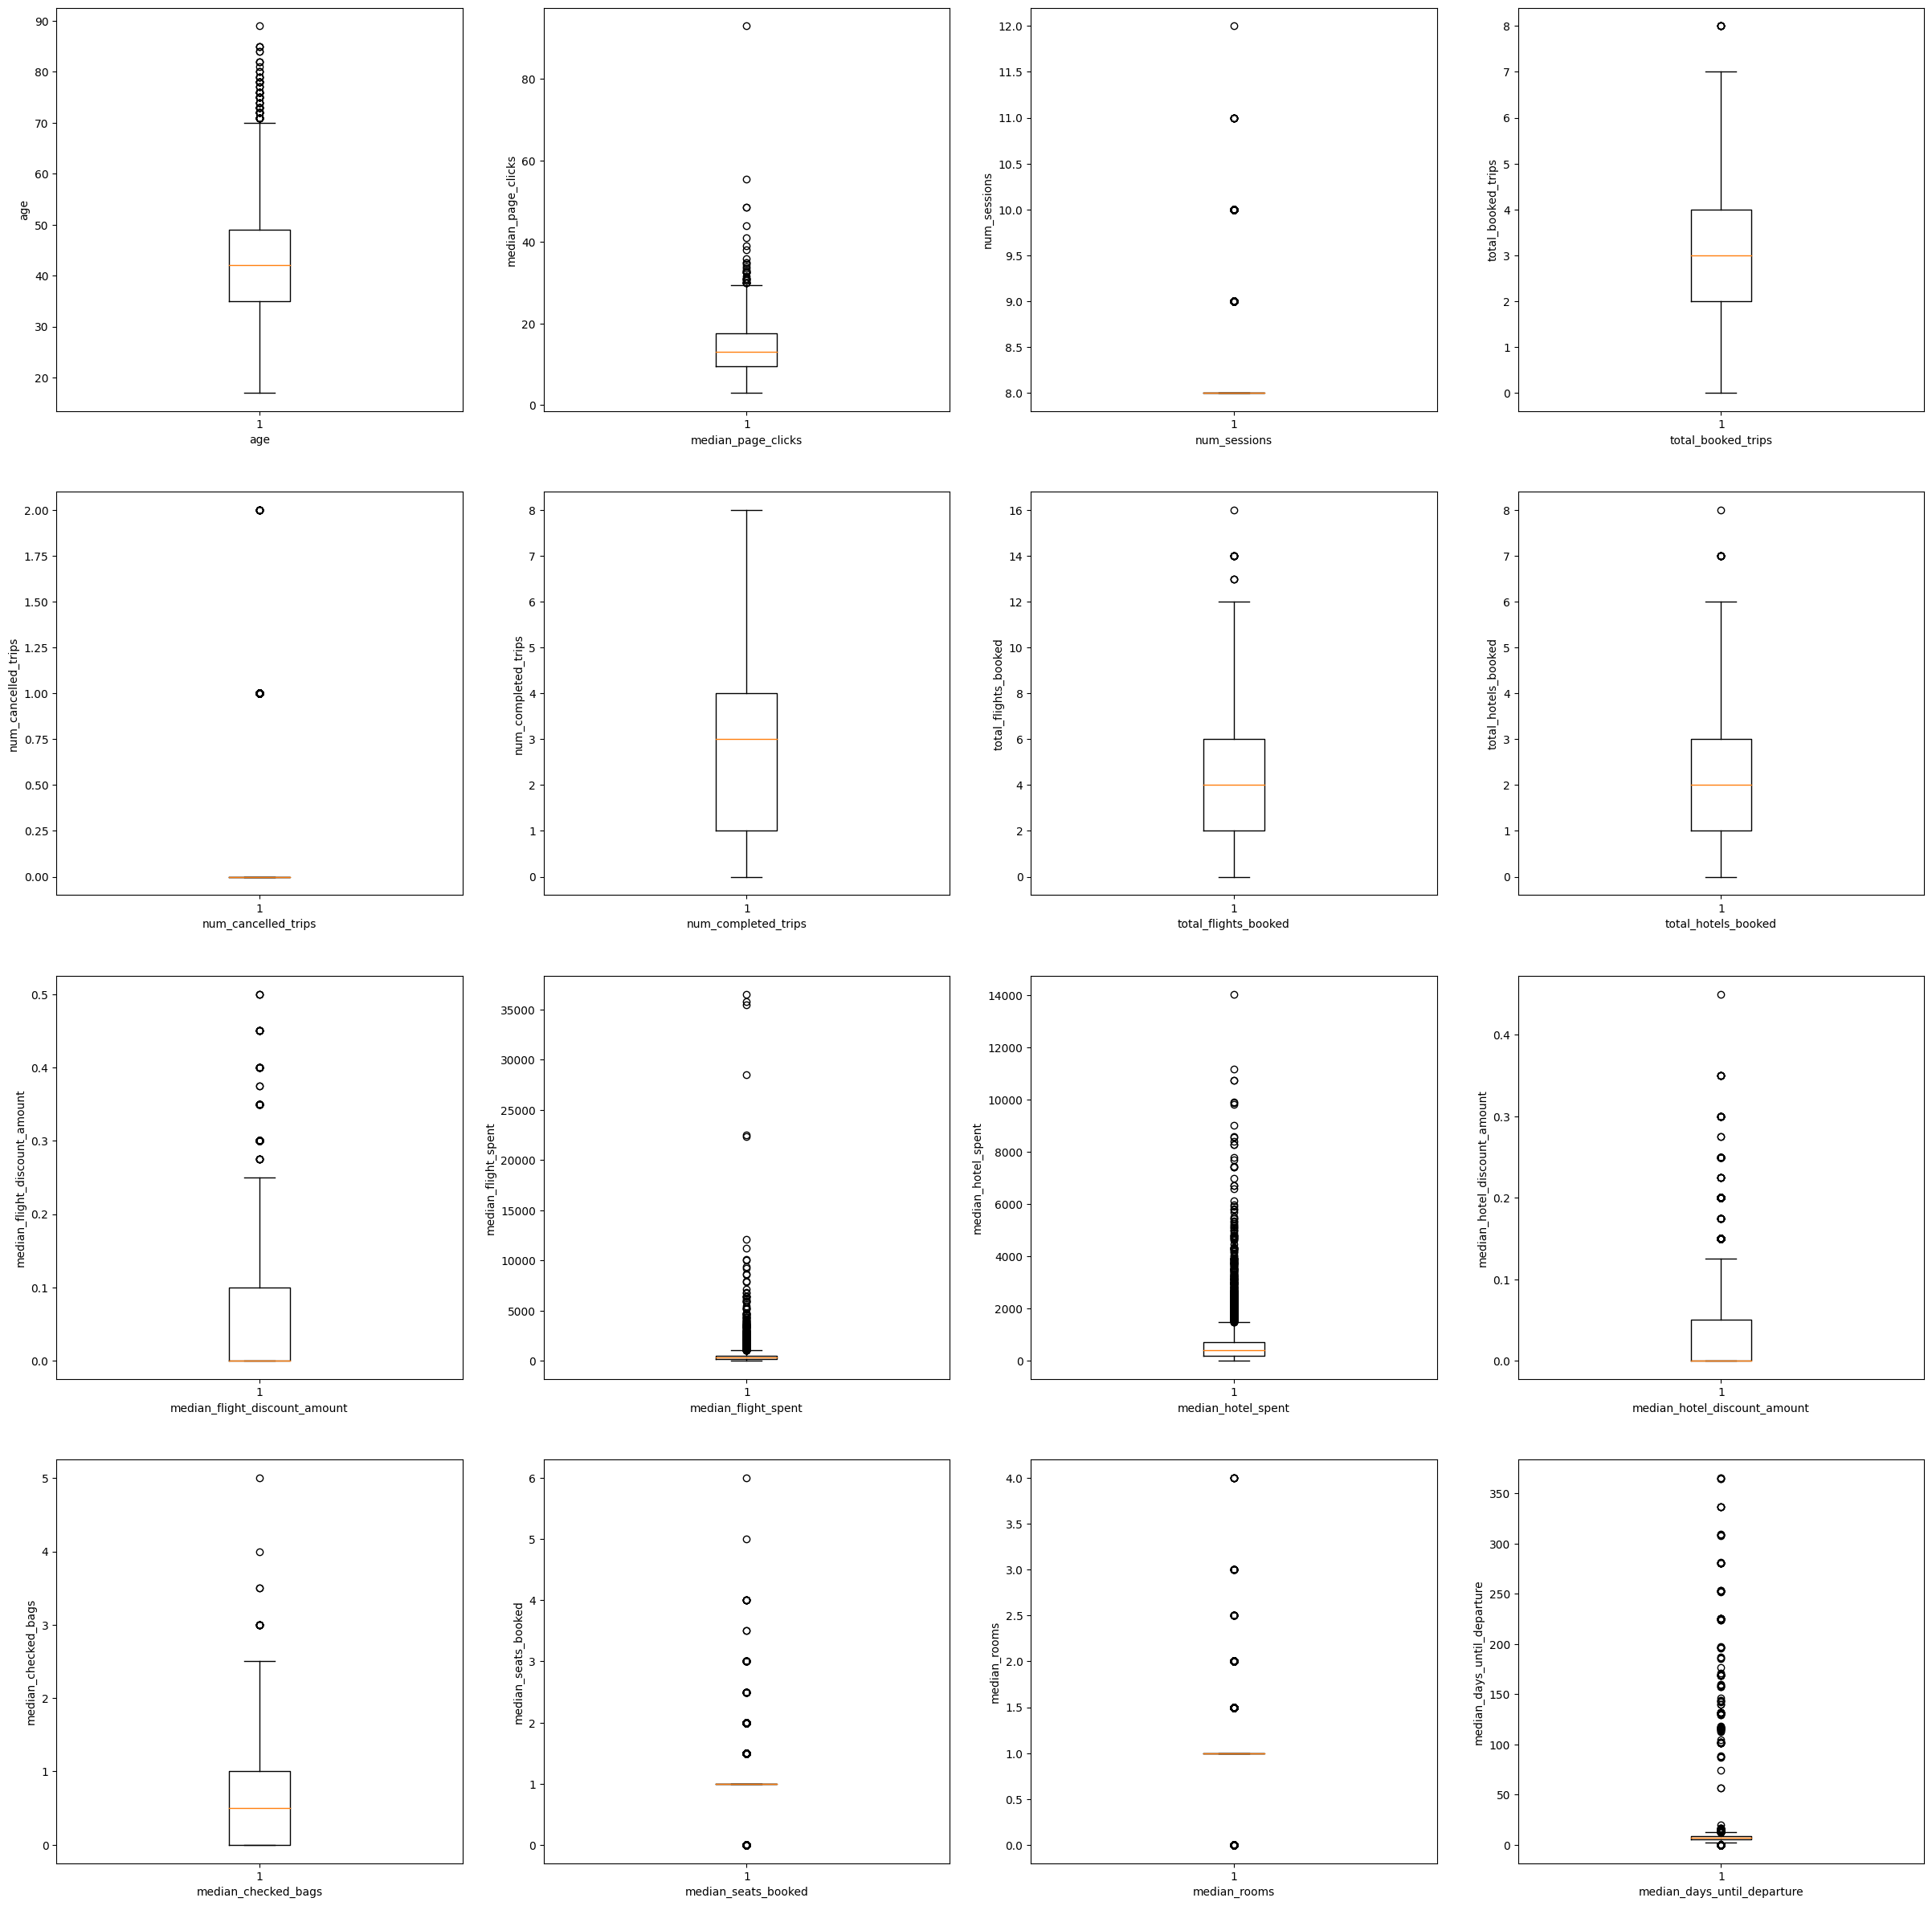

In [166]:
fig, axs=plt.subplots(4,4,figsize=(30,30))
axs=axs.flatten()
#plot histogram for each column
for i ,col in enumerate(num_features):
    axs[i].boxplot(customer[col])
    axs[i].set_xlabel(col)
    axs[i].set_ylabel(col)

#Bi Variate Analysis

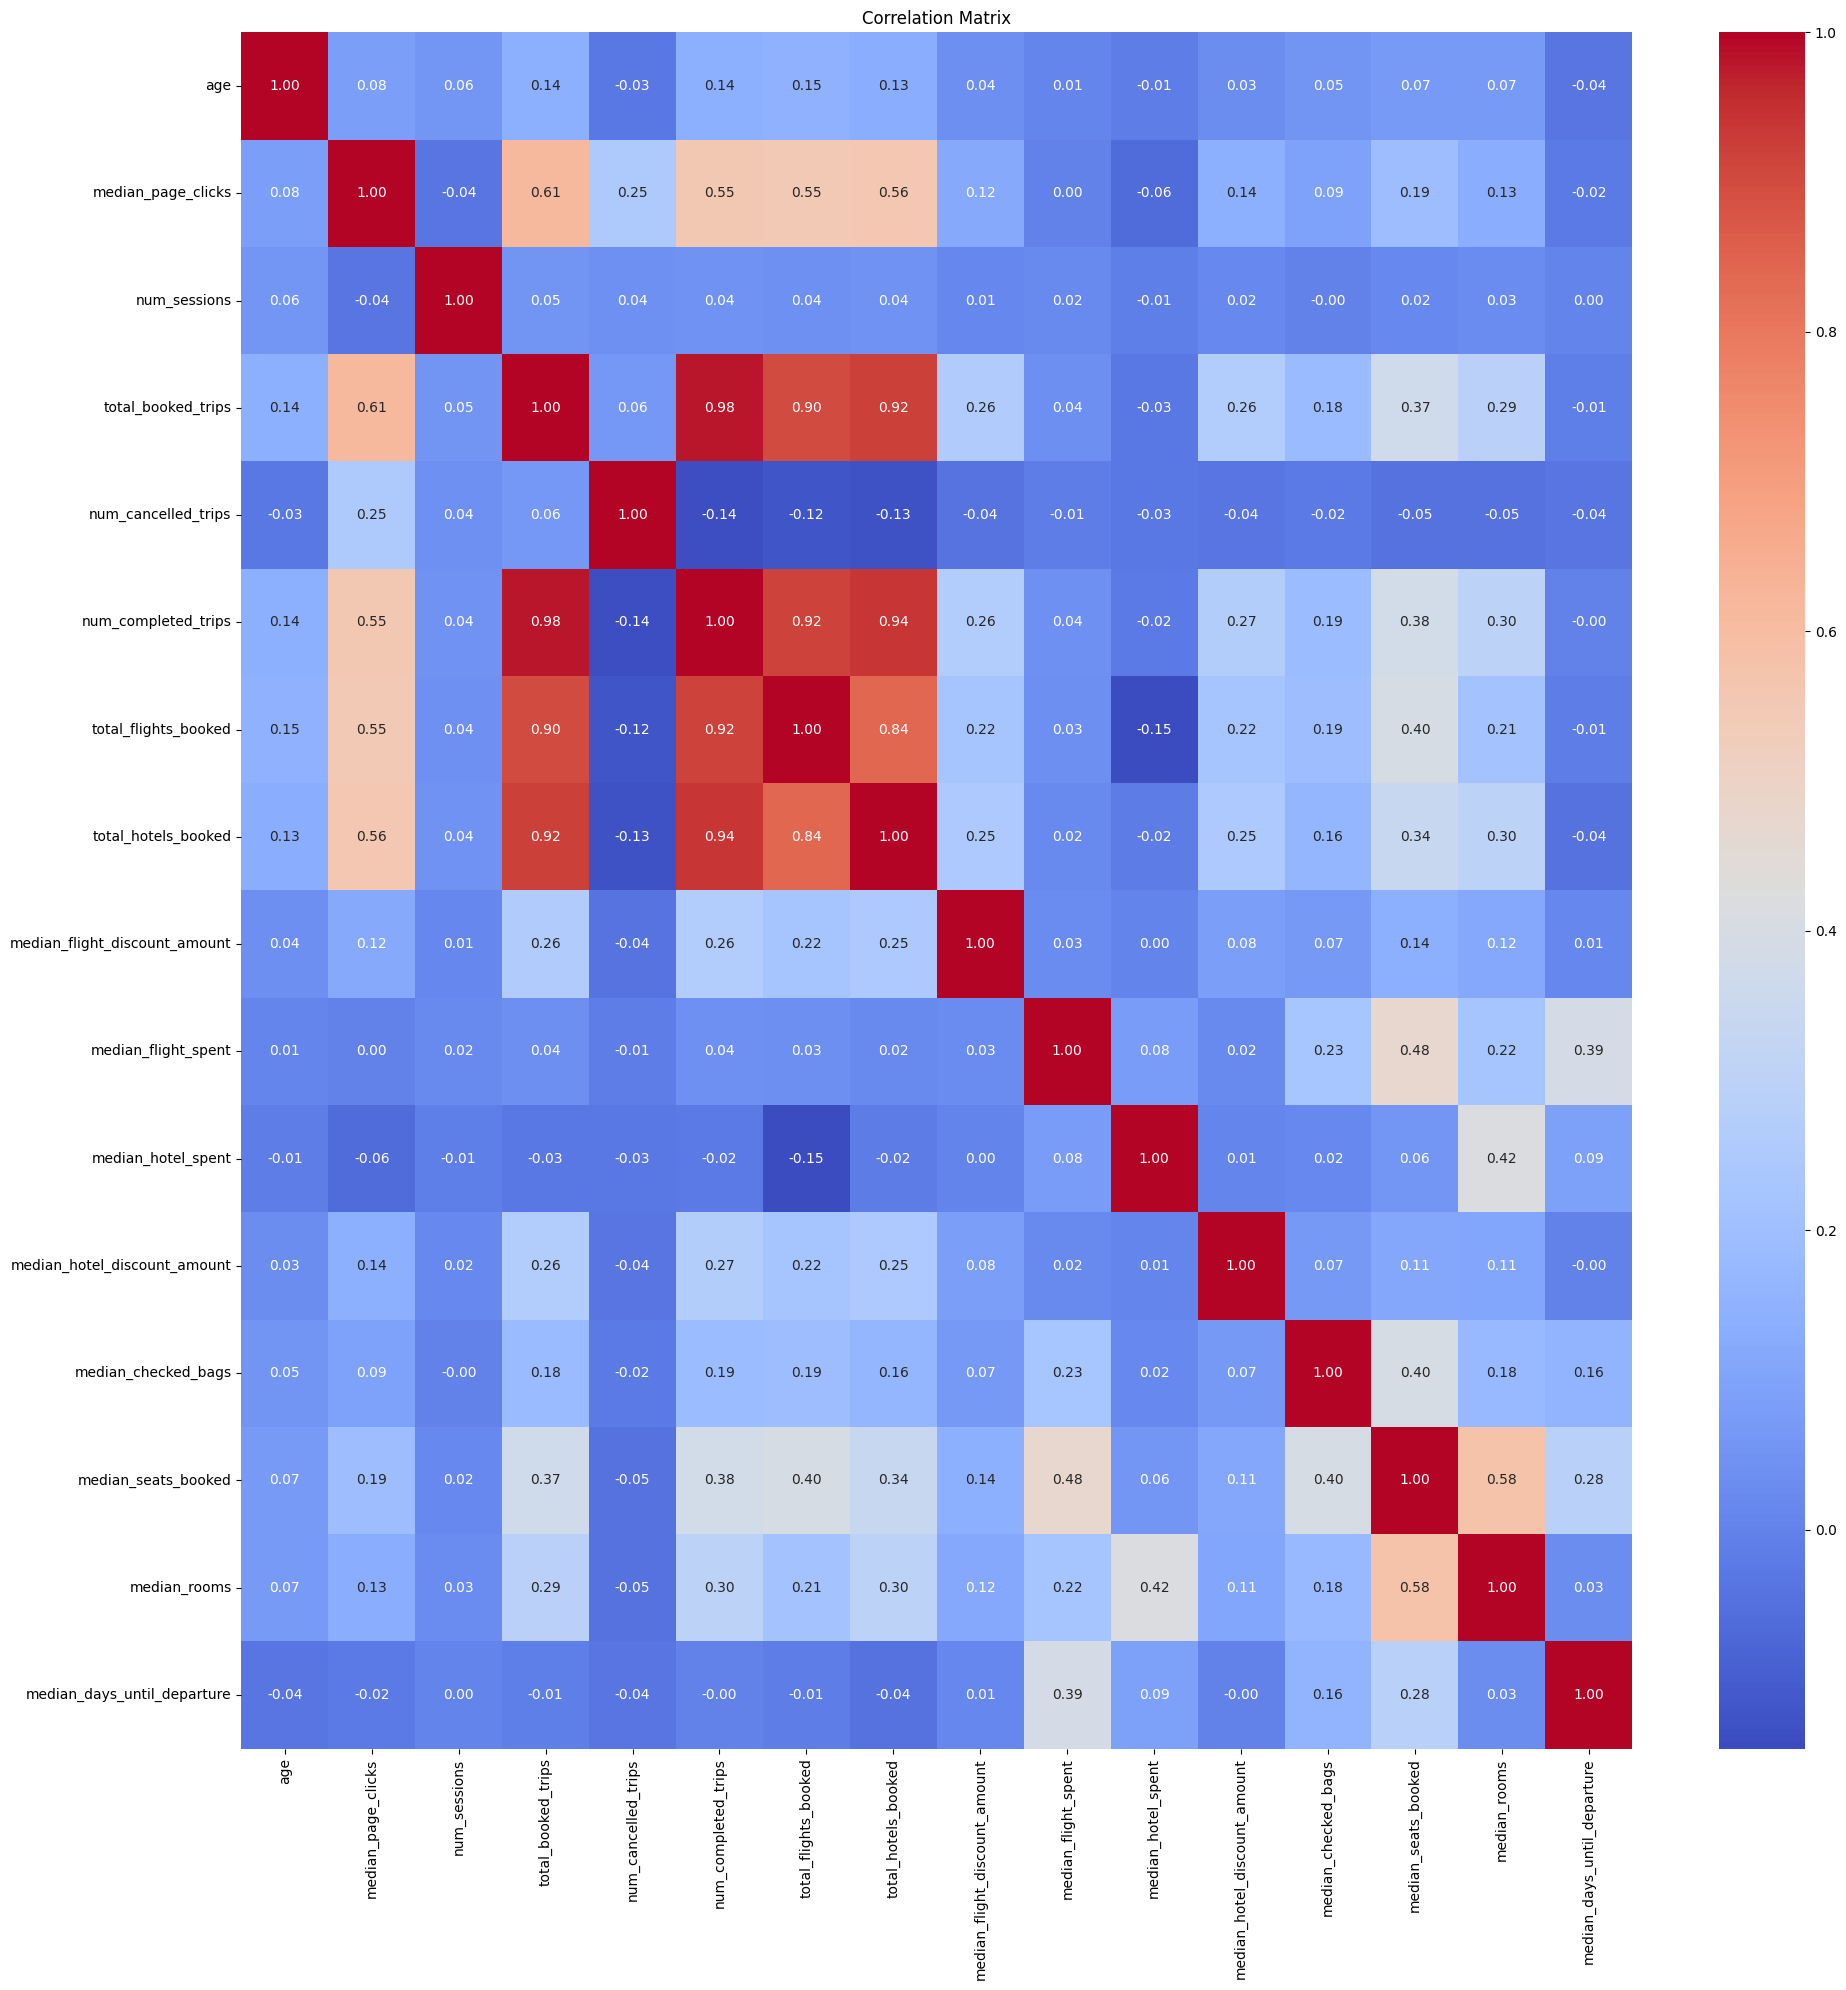

In [98]:
def plotCorrelationMatrix(df,figsize=(20,20)):
    corr=df.corr()
    plt.figure(figsize=figsize)
    sns.heatmap(corr,annot=True,cmap='coolwarm',fmt='.2f',annot_kws={"size":10})
    plt.title("Correlation Matrix")
    plt.tight_layout()
    plt.show()
plotCorrelationMatrix(customer[num_features],figsize=(20,20))

converting  boolean datatype to int

In [99]:
customer[['married', 'has_children']] = customer[['married', 'has_children']].astype(int)

In [100]:
customer.head()

,age,married,has_children,median_page_clicks,num_sessions,total_booked_trips,num_cancelled_trips,num_completed_trips,total_flights_booked,total_hotels_booked,median_flight_discount_amount,median_flight_spent,median_hotel_spent,median_hotel_discount_amount,median_checked_bags,median_seats_booked,median_rooms,median_days_until_departure
user_id,,,,,,,,,,,,,,,,,,
23557,65,1,0,9.0,8,2,0,2.0,0.0,2.0,0.0,0.00,1835.25,0.25,0.0,0.0,1.5,0.000000
94883,52,1,0,5.0,8,2,0,2.0,4.0,2.0,0.0,743.63,115.00,0.00,0.5,1.5,1.5,7.151759
101486,51,1,1,19.5,8,2,0,2.0,2.0,2.0,0.0,189.91,1099.50,0.00,0.0,1.0,1.5,9.039838
101961,43,1,0,18.0,8,5,0,5.0,10.0,5.0,0.1,129.90,504.00,0.00,0.0,1.0,1.0,5.762928
106907,45,1,1,19.0,8,1,1,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.000000


Standard Normalization

In [101]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
customer_scaled=scaler.fit_transform(customer)
customer_scaled

array([[ 1.92642021,  1.1270536 , -0.69617057, ..., -1.7966181 ,
         1.02436142, -0.3578805 ],
       [ 0.84690165,  1.1270536 , -0.69617057, ...,  1.06379122,
         1.02436142, -0.09921852],
       [ 0.76386176,  1.1270536 ,  1.43642958, ...,  0.11032144,
         1.02436142, -0.03093124],
       ...,
       [ 1.01298143,  1.1270536 ,  1.43642958, ...,  0.11032144,
        -0.01419838, -0.08144156],
       [ 0.26562243,  1.1270536 ,  1.43642958, ...,  0.11032144,
        -0.01419838,  0.02490124],
       [-1.47821525, -0.88726925,  1.43642958, ..., -1.7966181 ,
        -2.09131799, -0.3578805 ]])

In [102]:
customer_scaled=pd.DataFrame(customer_scaled)
customer_scaled.index=customer.index
customer_scaled.columns=customer.columns

In [103]:
customer_scaled.describe()

,age,married,has_children,median_page_clicks,num_sessions,total_booked_trips,num_cancelled_trips,num_completed_trips,total_flights_booked,total_hotels_booked,median_flight_discount_amount,median_flight_spent,median_hotel_spent,median_hotel_discount_amount,median_checked_bags,median_seats_booked,median_rooms,median_days_until_departure
count,5.998000e+03,5.998000e+03,5.998000e+03,5.998000e+03,5.998000e+03,5.998000e+03,5.998000e+03,5.998000e+03,5.998000e+03,5.998000e+03,5.998000e+03,5.998000e+03,5.998000e+03,5.998000e+03,5.998000e+03,5.998000e+03,5.998000e+03,5.998000e+03
mean,-1.919105e-16,2.369266e-18,-1.006938e-17,1.042477e-16,1.421559e-15,8.529356e-17,-2.132339e-17,6.633944e-17,9.477062e-18,9.477062e-17,2.369266e-17,3.790825e-17,4.975458e-17,-3.080045e-17,-6.870870e-17,-4.501605e-17,-2.132339e-16,7.403955e-17
std,1.000083e+00,1.000083e+00,1.000083e+00,1.000083e+00,1.000083e+00,1.000083e+00,1.000083e+00,1.000083e+00,1.000083e+00,1.000083e+00,1.000083e+00,1.000083e+00,1.000083e+00,1.000083e+00,1.000083e+00,1.000083e+00,1.000083e+00,1.000083e+00
min,-2.059494e+00,-8.872693e-01,-6.961706e-01,-1.953847e+00,-4.438717e-01,-1.764778e+00,-3.276248e-01,-1.684337e+00,-1.437067e+00,-1.590267e+00,-5.696650e-01,-4.059567e-01,-7.196342e-01,-5.590853e-01,-9.029903e-01,-1.796618e+00,-2.091318e+00,-3.578805e-01
25%,-5.647765e-01,-8.872693e-01,-6.961706e-01,-7.550676e-01,-4.438717e-01,-4.497724e-01,-3.276248e-01,-1.032090e+00,-7.672768e-01,-9.038522e-01,-5.696650e-01,-2.705725e-01,-4.864878e-01,-5.590853e-01,-9.029903e-01,1.103214e-01,-1.419838e-02,-1.544560e-01
50%,1.650276e-02,-8.872693e-01,-6.961706e-01,-1.095711e-01,-4.438717e-01,2.077306e-01,-3.276248e-01,2.724038e-01,-9.748692e-02,-2.174372e-01,-5.696650e-01,-1.178713e-01,-2.677688e-01,-5.590853e-01,6.159310e-02,1.103214e-01,-1.419838e-02,-1.046764e-01
75%,5.977820e-01,1.127054e+00,1.436430e+00,7.203529e-01,-4.438717e-01,8.652336e-01,-3.276248e-01,9.246506e-01,5.723029e-01,4.689778e-01,6.665328e-01,2.553451e-02,1.095070e-01,2.795776e-01,1.026176e+00,1.103214e-01,-1.419838e-02,-5.393241e-02
max,3.919378e+00,1.127054e+00,1.436430e+00,1.464463e+01,8.235322e+00,3.495246e+00,6.115304e+00,3.533638e+00,3.921252e+00,3.901053e+00,5.611324e+00,3.036693e+01,1.550481e+01,6.988881e+00,8.742843e+00,9.645019e+00,6.217160e+00,1.284605e+01


PCA(Principal Component Analysis)

In [104]:
from sklearn.decomposition import PCA
pca=PCA(n_components=0.9)
customer_pca=pca.fit_transform(customer_scaled)

In [105]:
customer_pca = pd.DataFrame(customer_pca)
customer_pca.index = customer.index
customer_pca.columns = [f"pca_{i}"for i in range(customer_pca.shape[1])]
customer_pca

,pca_0,pca_1,pca_2,pca_3,pca_4,pca_5,pca_6,pca_7,pca_8,pca_9,pca_10,pca_11
user_id,,,,,,,,,,,,
23557,-1.065440,-0.191136,-1.820840,-2.564959,0.043804,0.244604,-0.827712,3.061795,2.583680,0.326095,-0.041372,-0.336395
94883,-0.520105,1.268794,-1.213732,-0.240221,-0.598928,-0.168960,-1.184936,-0.081209,-0.529474,-0.704839,1.148086,0.052951
101486,-0.507018,0.515840,-1.450819,-0.810579,0.902327,-1.147502,0.410521,0.042664,-0.655935,1.057261,0.402779,-0.346028
101961,3.110731,-1.398203,-0.567495,-0.231011,-0.358267,-0.325836,-0.755082,-0.929640,-0.224435,1.032381,0.228451,1.006051
106907,-3.493239,-1.735908,-1.260280,2.048222,2.772003,-0.996968,0.763005,0.056919,0.645754,0.690447,-0.230544,0.345393
...,...,...,...,...,...,...,...,...,...,...,...,...
792549,0.890886,-0.656170,0.556592,0.368740,-0.351639,-0.220665,-0.993364,-0.082261,-0.827088,-0.173923,0.231678,-0.647182
796032,-0.417794,-0.050925,-0.902566,0.800321,2.486293,-0.246576,-1.099585,-0.100093,0.269174,-0.372238,0.117191,0.393266
801660,0.780995,-0.480883,-1.738634,0.016245,-0.299226,-0.950378,0.868434,-1.233250,0.314064,0.890626,0.502072,-0.298014


In [106]:
customer_scaled=pd.DataFrame(customer_pca)
customer_scaled.index=customer.index
customer_pca.columns = [f"pca_{i}"for i in range(customer_pca.shape[1])]
customer_pca

,pca_0,pca_1,pca_2,pca_3,pca_4,pca_5,pca_6,pca_7,pca_8,pca_9,pca_10,pca_11
user_id,,,,,,,,,,,,
23557,-1.065440,-0.191136,-1.820840,-2.564959,0.043804,0.244604,-0.827712,3.061795,2.583680,0.326095,-0.041372,-0.336395
94883,-0.520105,1.268794,-1.213732,-0.240221,-0.598928,-0.168960,-1.184936,-0.081209,-0.529474,-0.704839,1.148086,0.052951
101486,-0.507018,0.515840,-1.450819,-0.810579,0.902327,-1.147502,0.410521,0.042664,-0.655935,1.057261,0.402779,-0.346028
101961,3.110731,-1.398203,-0.567495,-0.231011,-0.358267,-0.325836,-0.755082,-0.929640,-0.224435,1.032381,0.228451,1.006051
106907,-3.493239,-1.735908,-1.260280,2.048222,2.772003,-0.996968,0.763005,0.056919,0.645754,0.690447,-0.230544,0.345393
...,...,...,...,...,...,...,...,...,...,...,...,...
792549,0.890886,-0.656170,0.556592,0.368740,-0.351639,-0.220665,-0.993364,-0.082261,-0.827088,-0.173923,0.231678,-0.647182
796032,-0.417794,-0.050925,-0.902566,0.800321,2.486293,-0.246576,-1.099585,-0.100093,0.269174,-0.372238,0.117191,0.393266
801660,0.780995,-0.480883,-1.738634,0.016245,-0.299226,-0.950378,0.868434,-1.233250,0.314064,0.890626,0.502072,-0.298014


KMeans

In [107]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [108]:
scores = []
for n_clusters in range(2,20):
  kmeans = KMeans(n_clusters=n_clusters)
  groups = kmeans.fit_predict(customer_pca)
  scores.append(silhouette_score(customer_pca,groups))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

[0.18859750370747214,
 0.15610042468098975,
 0.16055624032576438,
 0.14994890236652095,
 0.15354497849397816,
 0.14781237266070985,
 0.1497079657590666,
 0.14826996844071963,
 0.15054765594352587,
 0.15074845400418424,
 0.15547828881589515,
 0.13868308890939723,
 0.13457872912365895,
 0.13925219391106333,
 0.1405420313261594,
 0.1416478011253434,
 0.13672554140226342,
 0.13915699728774927]

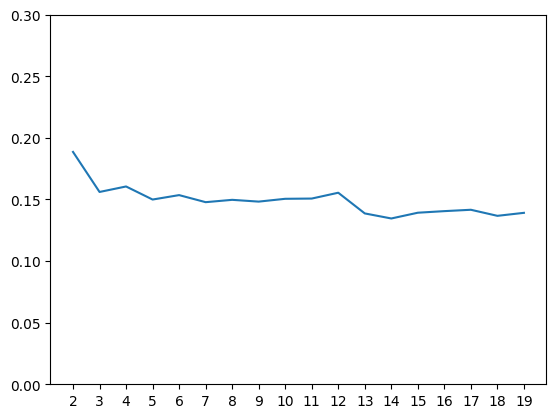

In [109]:
ax = sns.lineplot(x=range(2,20),y=scores)
ax.set_xticks(range(2,20))
ax.set_ylim(0,0.3)
scores

In [110]:
X = np.random.rand(100, 2)

In [111]:
kmeans = KMeans(n_clusters=4,init='random', random_state=42)
groups = kmeans.fit_predict(customer_pca)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [112]:
groups

array([2, 2, 2, ..., 1, 2, 3], dtype=int32)

In [113]:
groups = pd.Series(groups)
groups.index = customer.index
groups.name = "group"
groups

user_id
23557     2
94883     2
101486    2
101961    1
106907    3
         ..
792549    1
796032    2
801660    1
811077    2
844489    3
Name: group, Length: 5998, dtype: int32

In [114]:
pd.crosstab(groups,"count")

col_0,count
group,
0,88
1,2222
2,2850
3,838


In [115]:
customers_viz = pd.concat([customer_pca,groups],axis=1)
customers_viz

,pca_0,pca_1,pca_2,pca_3,pca_4,pca_5,pca_6,pca_7,pca_8,pca_9,pca_10,pca_11,group
user_id,,,,,,,,,,,,,
23557,-1.065440,-0.191136,-1.820840,-2.564959,0.043804,0.244604,-0.827712,3.061795,2.583680,0.326095,-0.041372,-0.336395,2
94883,-0.520105,1.268794,-1.213732,-0.240221,-0.598928,-0.168960,-1.184936,-0.081209,-0.529474,-0.704839,1.148086,0.052951,2
101486,-0.507018,0.515840,-1.450819,-0.810579,0.902327,-1.147502,0.410521,0.042664,-0.655935,1.057261,0.402779,-0.346028,2
101961,3.110731,-1.398203,-0.567495,-0.231011,-0.358267,-0.325836,-0.755082,-0.929640,-0.224435,1.032381,0.228451,1.006051,1
106907,-3.493239,-1.735908,-1.260280,2.048222,2.772003,-0.996968,0.763005,0.056919,0.645754,0.690447,-0.230544,0.345393,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
792549,0.890886,-0.656170,0.556592,0.368740,-0.351639,-0.220665,-0.993364,-0.082261,-0.827088,-0.173923,0.231678,-0.647182,1
796032,-0.417794,-0.050925,-0.902566,0.800321,2.486293,-0.246576,-1.099585,-0.100093,0.269174,-0.372238,0.117191,0.393266,2
801660,0.780995,-0.480883,-1.738634,0.016245,-0.299226,-0.950378,0.868434,-1.233250,0.314064,0.890626,0.502072,-0.298014,1


<Axes: xlabel='pca_0', ylabel='pca_1'>

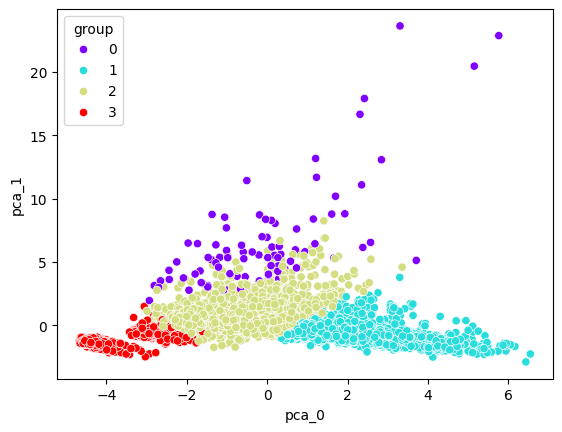

In [116]:
sns.scatterplot(data=customers_viz,x="pca_0",y="pca_1",hue="group",palette="rainbow",legend='full')

#Joining customer df and group  df together

In [117]:
customers=pd.merge(customer,groups,on="user_id")

In [118]:
customers.head()

,age,married,has_children,median_page_clicks,num_sessions,total_booked_trips,num_cancelled_trips,num_completed_trips,total_flights_booked,total_hotels_booked,median_flight_discount_amount,median_flight_spent,median_hotel_spent,median_hotel_discount_amount,median_checked_bags,median_seats_booked,median_rooms,median_days_until_departure,group
user_id,,,,,,,,,,,,,,,,,,,
23557,65,1,0,9.0,8,2,0,2.0,0.0,2.0,0.0,0.00,1835.25,0.25,0.0,0.0,1.5,0.000000,2
94883,52,1,0,5.0,8,2,0,2.0,4.0,2.0,0.0,743.63,115.00,0.00,0.5,1.5,1.5,7.151759,2
101486,51,1,1,19.5,8,2,0,2.0,2.0,2.0,0.0,189.91,1099.50,0.00,0.0,1.0,1.5,9.039838,2
101961,43,1,0,18.0,8,5,0,5.0,10.0,5.0,0.1,129.90,504.00,0.00,0.0,1.0,1.0,5.762928,1
106907,45,1,1,19.0,8,1,1,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.000000,3


In [119]:
customers.shape

(5998, 19)

<ipython-input-120-0709a2ffe610>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="group", y=column, data=customers, palette="rainbow")


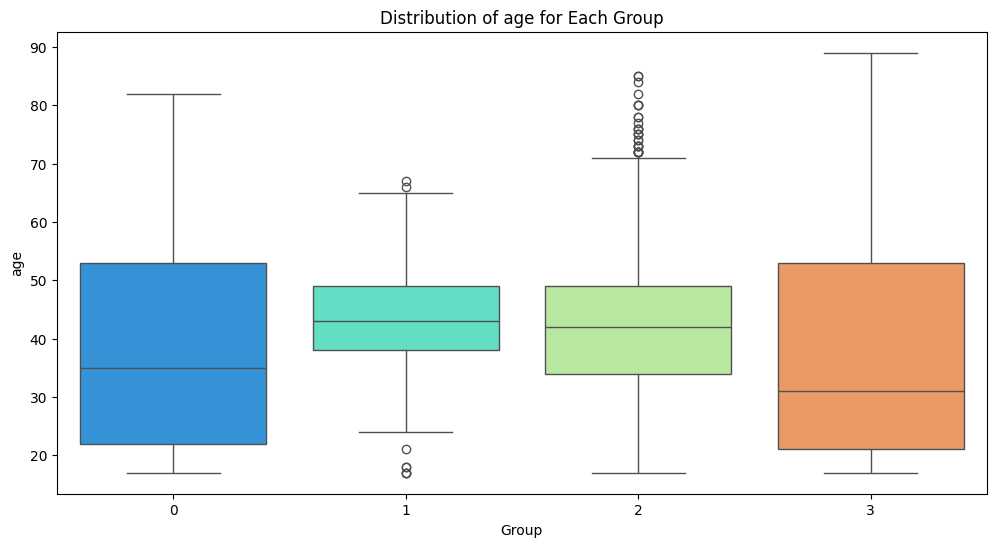

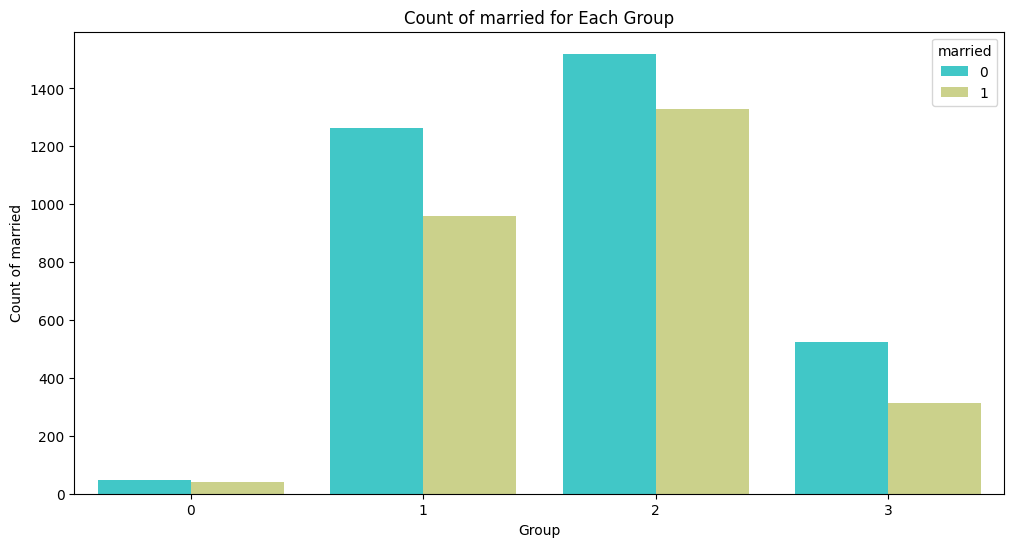

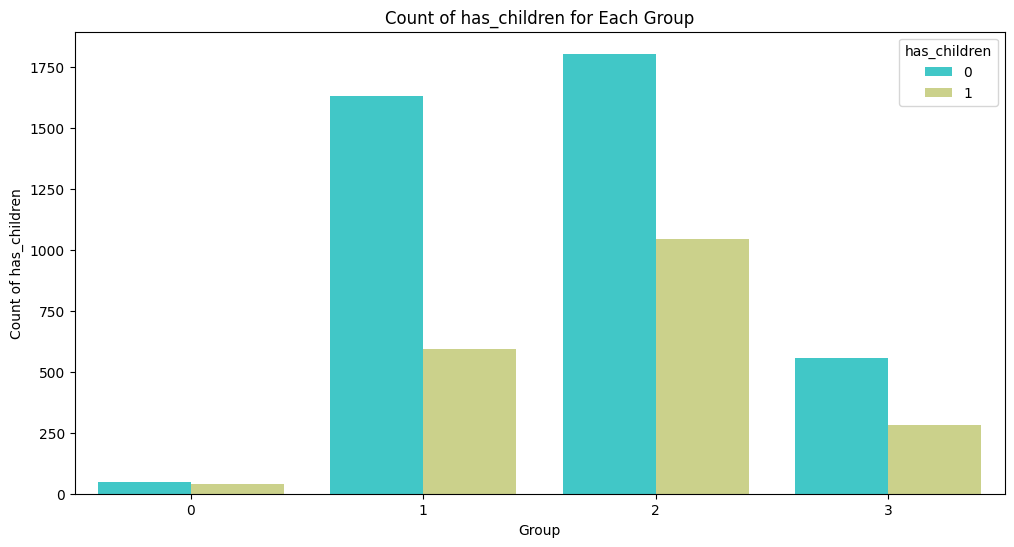

<ipython-input-120-0709a2ffe610>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="group", y=column, data=customers, palette="rainbow")


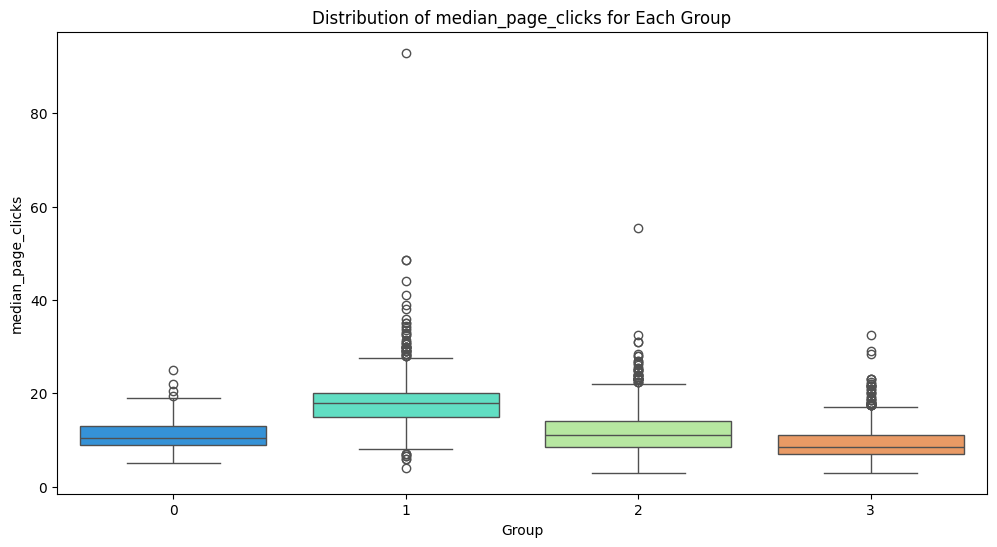

<ipython-input-120-0709a2ffe610>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="group", y=column, data=customers, palette="rainbow")


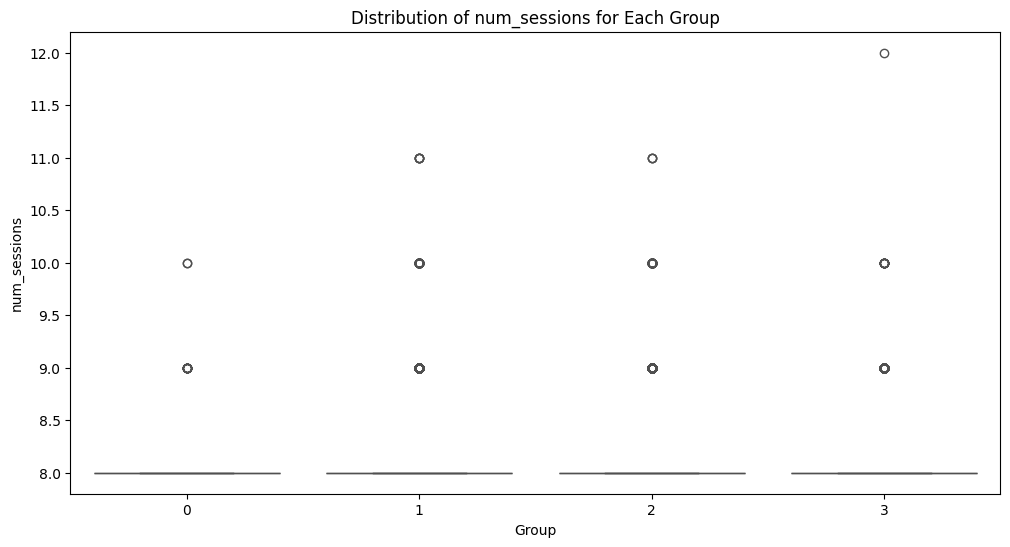

<ipython-input-120-0709a2ffe610>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="group", y=column, data=customers, palette="rainbow")


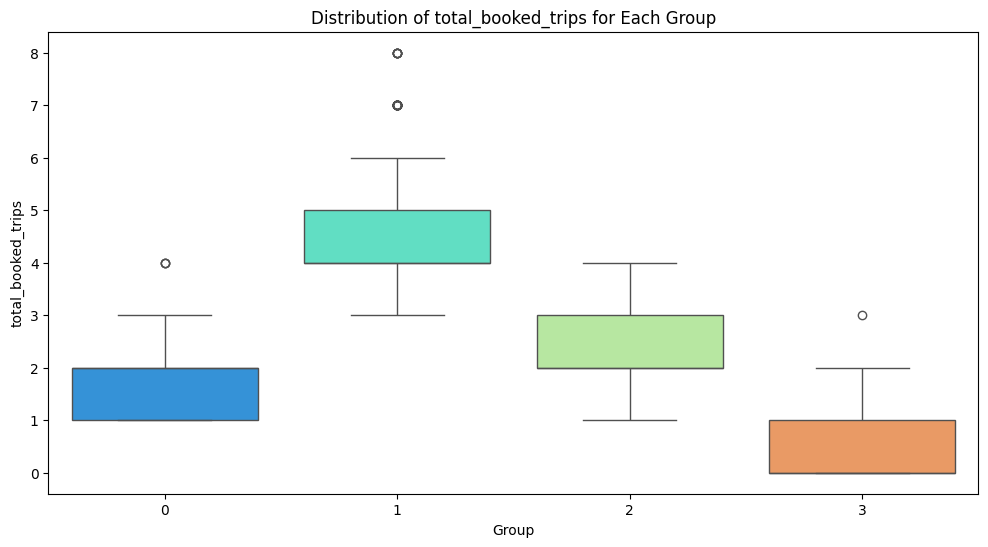

<ipython-input-120-0709a2ffe610>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="group", y=column, data=customers, palette="rainbow")


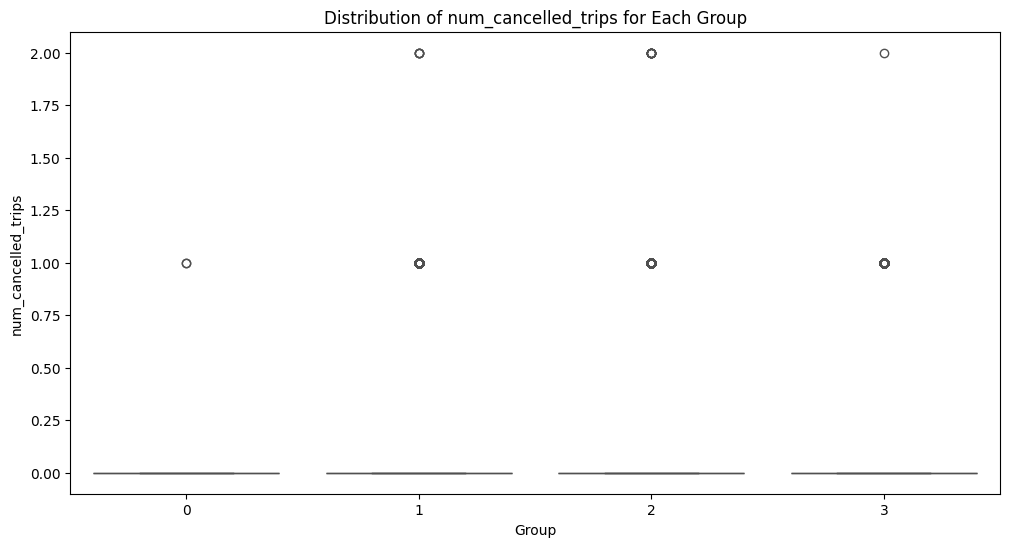

<ipython-input-120-0709a2ffe610>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="group", y=column, data=customers, palette="rainbow")


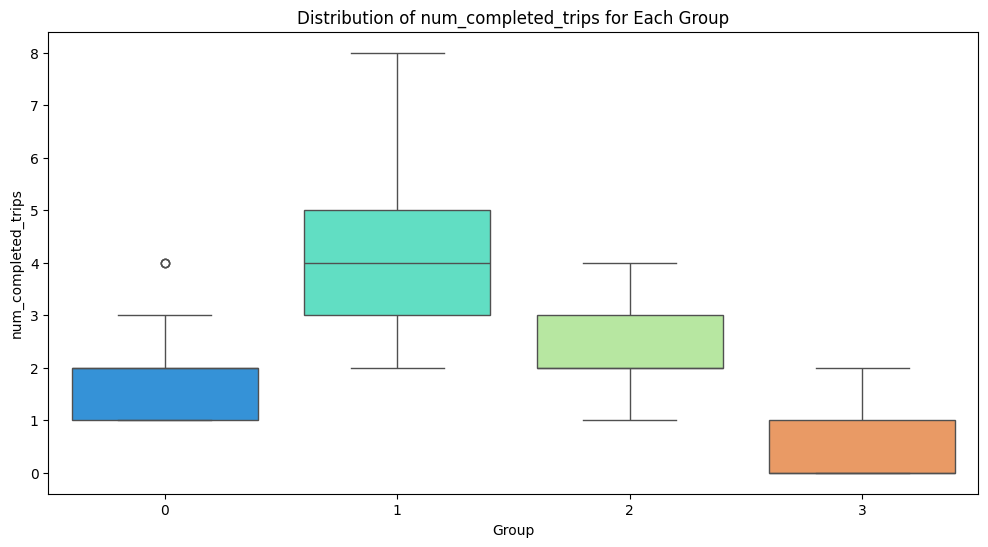

<ipython-input-120-0709a2ffe610>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="group", y=column, data=customers, palette="rainbow")


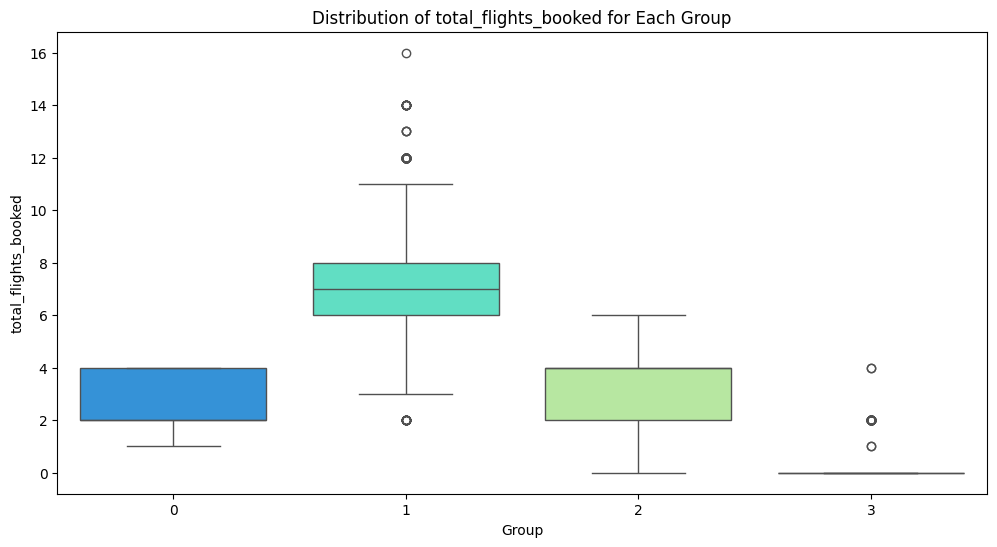

<ipython-input-120-0709a2ffe610>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="group", y=column, data=customers, palette="rainbow")


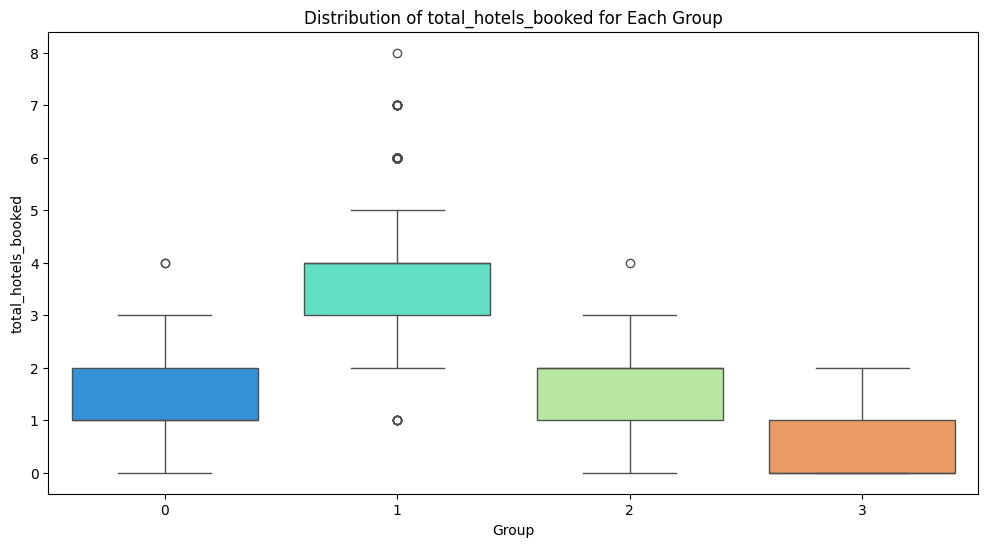

<ipython-input-120-0709a2ffe610>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="group", y=column, data=customers, palette="rainbow")


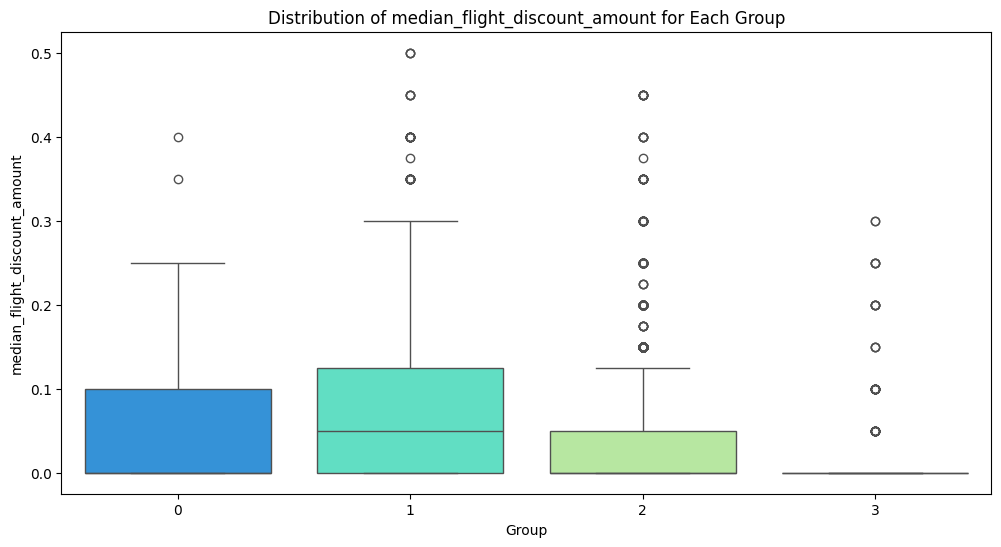

<ipython-input-120-0709a2ffe610>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="group", y=column, data=customers, palette="rainbow")


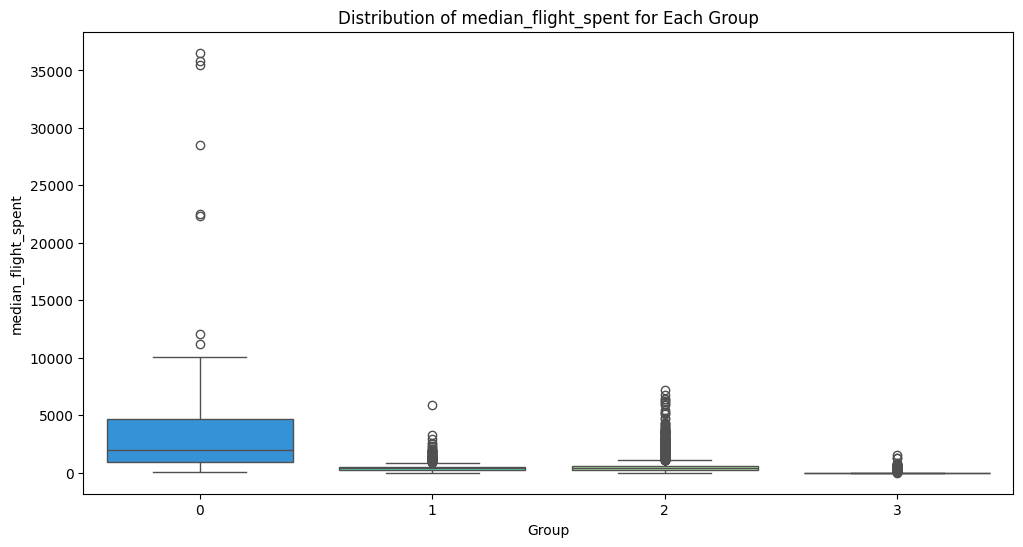

<ipython-input-120-0709a2ffe610>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="group", y=column, data=customers, palette="rainbow")


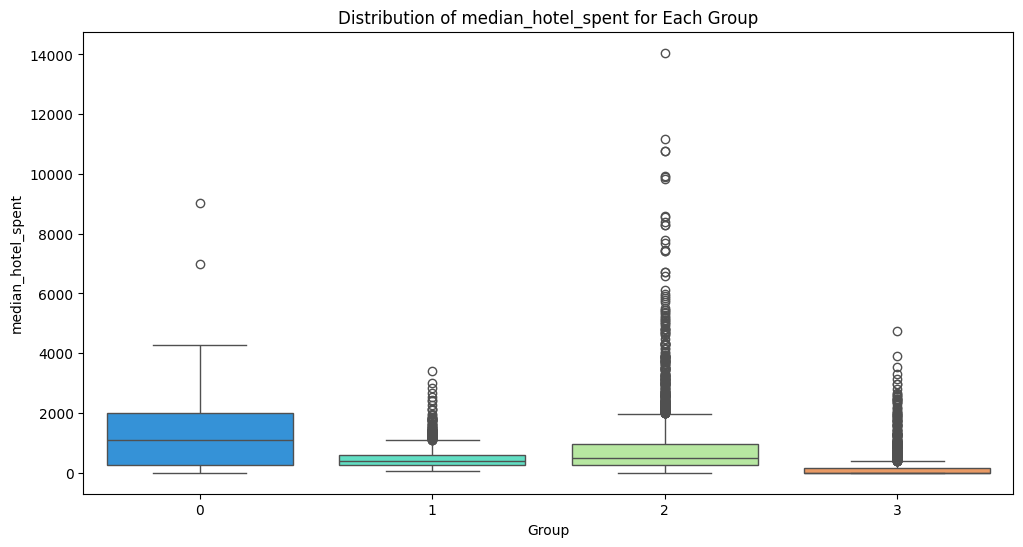

<ipython-input-120-0709a2ffe610>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="group", y=column, data=customers, palette="rainbow")


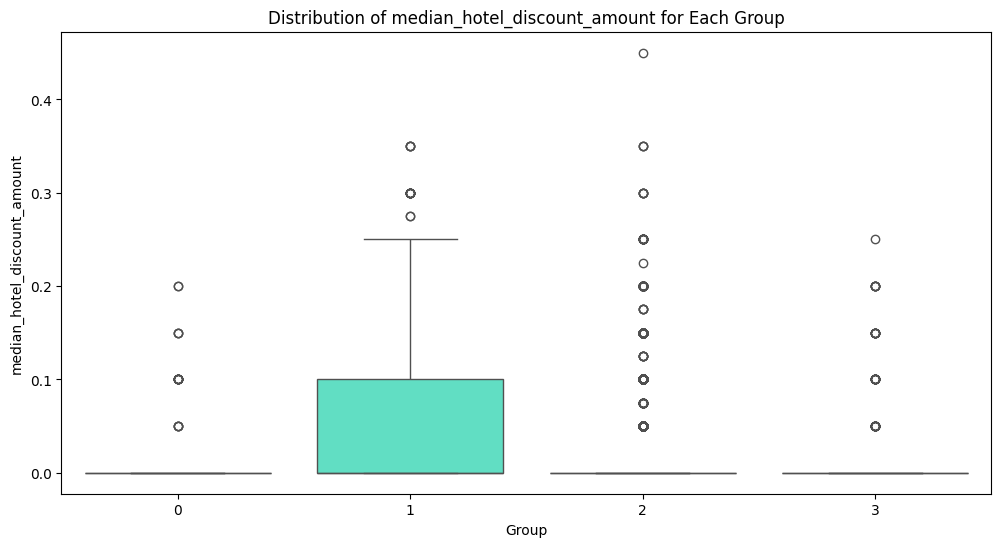

<ipython-input-120-0709a2ffe610>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="group", y=column, data=customers, palette="rainbow")


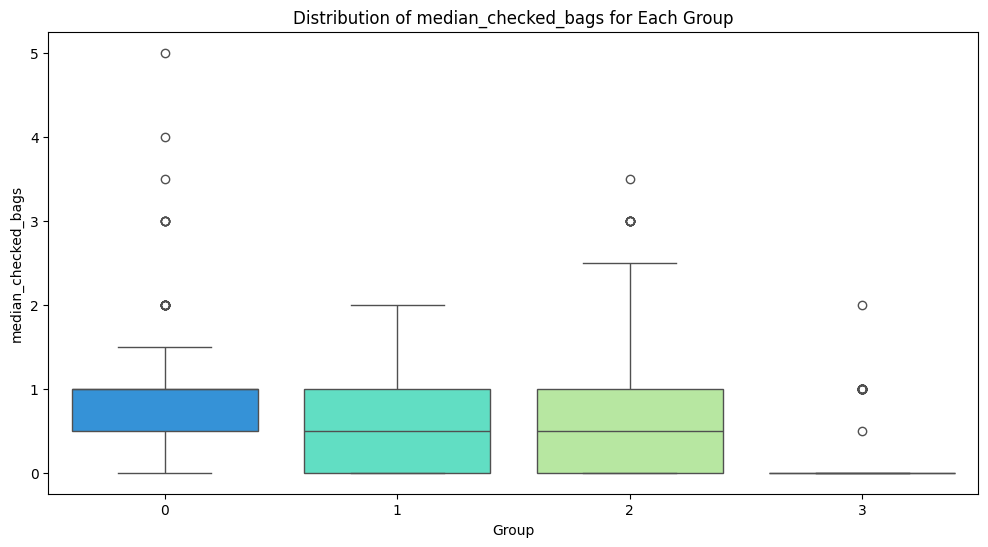

<ipython-input-120-0709a2ffe610>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="group", y=column, data=customers, palette="rainbow")


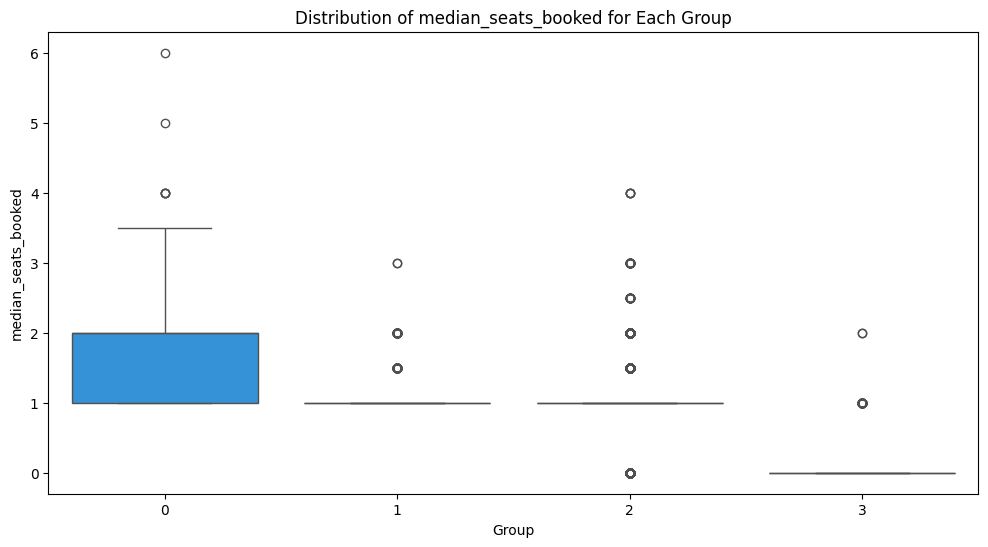

<ipython-input-120-0709a2ffe610>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="group", y=column, data=customers, palette="rainbow")


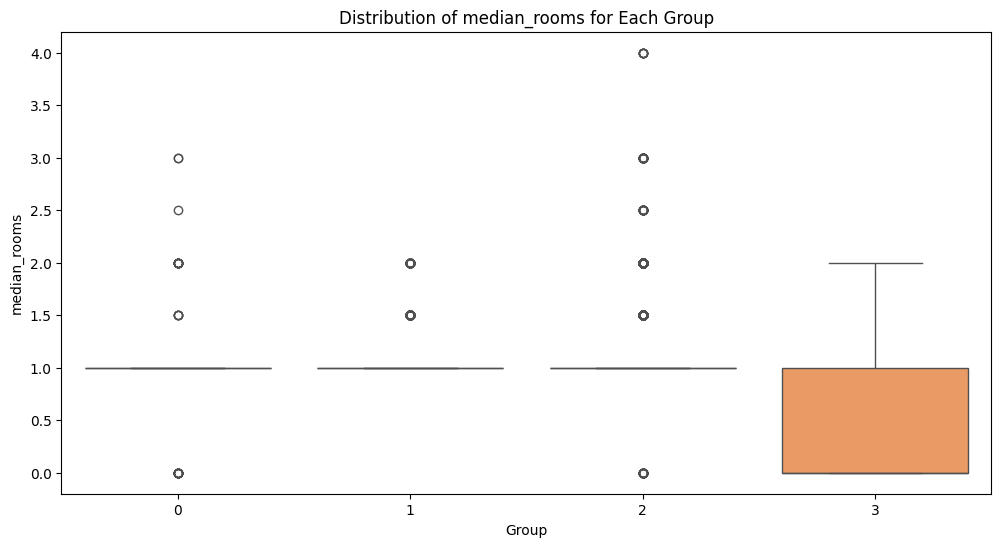

<ipython-input-120-0709a2ffe610>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="group", y=column, data=customers, palette="rainbow")


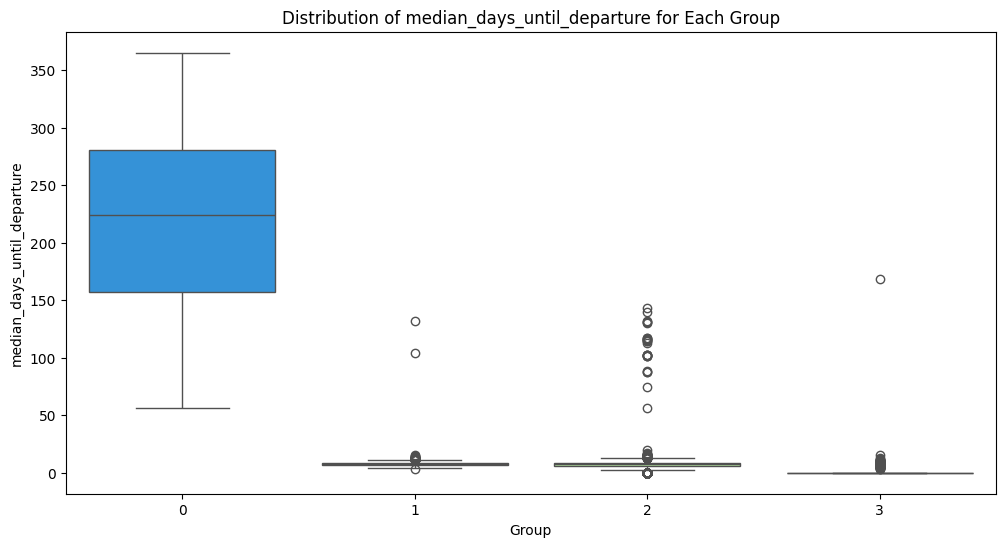

In [120]:
for column in customers.columns:
    if column != "group":
        plt.figure(figsize=(12, 6))
        if customers[column].nunique() == 2:  # For binary columns
            sns.countplot(x="group", hue=column, data=customers, palette="rainbow")
            plt.title(f"Count of {column} for Each Group")
            plt.xlabel("Group")
            plt.ylabel(f"Count of {column}")
        else:  # For continuous columns
            sns.boxplot(x="group", y=column, data=customers, palette="rainbow")
            plt.title(f"Distribution of {column} for Each Group")
            plt.xlabel("Group")
            plt.ylabel(column)
        plt.show()

In [121]:
pd.crosstab(customers["group"],[customers["num_cancelled_trips"]])

num_cancelled_trips,0,1,2
group,,,
0,86,2,0
1,2028,190,4
2,2582,258,10
3,707,130,1


In [122]:
pd.crosstab(customers["group"],[customers["num_completed_trips"]])

num_completed_trips,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0
group,,,,,,,,,
0,0,32,40,13,3,0,0,0,0
1,0,0,11,571,987,467,157,24,5
2,0,692,1316,830,12,0,0,0,0
3,556,268,14,0,0,0,0,0,0


In [123]:
pd.crosstab(customers["group"],[customers["age"]])

age,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,84,85,89
group,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,7,3,1,5,4,3,2,2,3,2,1,0,3,1,0,2,2,2,4,1,1,3,1,3,0,1,0,1,3,0,2,1,0,0,0,1,2,0,1,0,1,0,3,2,0,0,2,0,1,1,1,3,0,0,2,0,0,0,1,1,0,0,1,0,0,1,0,0,0
1,3,2,0,0,1,0,0,1,2,7,19,24,20,22,26,44,30,39,33,66,96,126,129,99,114,104,126,89,115,92,97,100,89,68,68,80,66,71,56,48,17,8,8,5,0,0,3,4,3,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,38,59,11,18,28,24,28,26,42,31,35,53,48,51,61,49,57,69,75,86,87,88,98,106,92,113,103,109,105,87,87,116,80,89,81,59,54,59,51,46,37,31,26,19,2,3,12,23,15,19,9,11,6,6,4,6,4,2,3,3,1,2,0,3,0,1,1,2,0
3,63,75,21,25,30,22,30,39,41,38,11,4,10,8,12,10,15,9,12,16,11,6,5,8,8,5,4,10,12,7,13,15,8,10,13,1,4,3,10,5,10,11,13,5,2,4,4,2,4,12,16,25,19,12,12,5,7,3,3,5,2,5,3,0,1,1,1,1,1


In [124]:
pd.crosstab(customers["group"],[customers["age"]])

age,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,84,85,89
group,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,7,3,1,5,4,3,2,2,3,2,1,0,3,1,0,2,2,2,4,1,1,3,1,3,0,1,0,1,3,0,2,1,0,0,0,1,2,0,1,0,1,0,3,2,0,0,2,0,1,1,1,3,0,0,2,0,0,0,1,1,0,0,1,0,0,1,0,0,0
1,3,2,0,0,1,0,0,1,2,7,19,24,20,22,26,44,30,39,33,66,96,126,129,99,114,104,126,89,115,92,97,100,89,68,68,80,66,71,56,48,17,8,8,5,0,0,3,4,3,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,38,59,11,18,28,24,28,26,42,31,35,53,48,51,61,49,57,69,75,86,87,88,98,106,92,113,103,109,105,87,87,116,80,89,81,59,54,59,51,46,37,31,26,19,2,3,12,23,15,19,9,11,6,6,4,6,4,2,3,3,1,2,0,3,0,1,1,2,0
3,63,75,21,25,30,22,30,39,41,38,11,4,10,8,12,10,15,9,12,16,11,6,5,8,8,5,4,10,12,7,13,15,8,10,13,1,4,3,10,5,10,11,13,5,2,4,4,2,4,12,16,25,19,12,12,5,7,3,3,5,2,5,3,0,1,1,1,1,1


In [125]:
pd.crosstab(customers["group"],[customers["has_children"]])

has_children,0,1
group,,
0,50,38
1,1630,592
2,1804,1046
3,556,282


In [126]:
pd.crosstab(customers["group"],[customers["total_booked_trips"]])

total_booked_trips,0,1,2,3,4,5,6,7,8
group,,,,,,,,,
0,0,30,42,13,3,0,0,0,0
1,0,0,0,470,1041,512,167,26,6
2,0,589,1265,963,33,0,0,0,0
3,456,337,44,1,0,0,0,0,0


In [127]:
pd.crosstab(customers["group"],[customers["num_completed_trips"]])

num_completed_trips,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0
group,,,,,,,,,
0,0,32,40,13,3,0,0,0,0
1,0,0,11,571,987,467,157,24,5
2,0,692,1316,830,12,0,0,0,0
3,556,268,14,0,0,0,0,0,0


In [128]:
pd.crosstab(customers["group"],[customers["num_cancelled_trips"]])

num_cancelled_trips,0,1,2
group,,,
0,86,2,0
1,2028,190,4
2,2582,258,10
3,707,130,1


In [129]:
hotel_flight_booked=customers.groupby("group")[["total_hotels_booked","total_flights_booked"]].sum()
hotel_flight_booked

,total_hotels_booked,total_flights_booked
group,,
0,108.0,227.0
1,8337.0,16044.0
2,5218.0,9331.0
3,233.0,136.0


In [163]:
fligh_hotel_discount=customers.groupby("group")[["median_hotel_discount_amount","median_flight_discount_amount"]].max()
fligh_hotel_discount

,median_hotel_discount_amount,median_flight_discount_amount
group,,
0,0.20,0.40
1,0.35,0.50
2,0.45,0.45
3,0.25,0.30


In [164]:
customers.groupby("group")["married"].sum()

group
0      40
1     958
2    1330
3     314
Name: married, dtype: int64

Creating anew column customer "PERK"

In [131]:
customers["perks"]=""

In [ ]:
percetiles_median_days_until_departure = np.percentile(customers["median_days_until_departure"], [ 30,40,50,60,70, 75, 80,90,95,99])
percetiles_median_days_until_departure

In [139]:
#Analysis group 2
#Assigning "One free Checked bag" to Family Vacationer


customers.loc[((customers["group"] == 2)&((customers["has_children"]==1)| (customers["married"] ==1))),
             "perks"] = "One Free Checked Bag"
customers.loc[(customers["group"] == 2) & ((customers["median_checked_bags"] >=2)|(customers["median_rooms"]>=2)),"perks"] = "One Free Checked Bag"

customers.loc[(customers["group"] == 2) &
             (customers["perks"] ==""),
             "perks"] = "Basic discount"



In [140]:
customers[customers['group']==2]['perks'].value_counts()

perks
One Free Checked Bag    1960
Basic discount           890
Name: count, dtype: int64

Group 1 is our Dreamer group. Most of the customers  of this group are not booking the trip.
some of the Customers are taking only hotels.
that's why i am seperating the dreamer group in two.
1st is Dreamer  and  2nd hotel_bookers

Assigning 20% discount on flight to our Dreamer Group

In [ ]:
percetiles_median_hotel_spent = np.percentile(customers["median_hotel_spent"], [ 40,50,60,70, 75, 80])

In [132]:
#Analysing group 3
#Assigning 20% discount on flight to our Dreamer Group



customers.loc[(customers["group"] == 3) &
             ((customers["total_flights_booked"] ==0)|
             (customers["total_booked_trips"] ==0)),
             "perks"] = "20% Off On First Flight"

customers.loc[(customers["group"] == 3) &
             (customers["perks"] ==""),
             "perks"] = "Basic discount"





In [133]:
customers[customers['group']==3]['perks'].value_counts()

perks
20% Off On First Flight    771
Basic discount              67
Name: count, dtype: int64

In [136]:
#Analysing group 0
#assigning Exclusive Discounts to group 0
customers.loc[(customers["group"] == 0)&(customers["median_days_until_departure"] >=120),"perks"]="Exclusive Discount"
customers.loc[(customers["group"] == 0) &
             (customers["perks"] ==""),
             "perks"] = "Basic discount"



In [137]:
customers[customers['group']==0]['perks'].value_counts()

perks
Exclusive Discount    78
Basic discount        10
Name: count, dtype: int64

Group 3 is our  Buisiness Travelers.
Their Age is betwwn 30-60 and Travel Frequency is High Most of the time they are doing  last minute booking.

In [ ]:
percetiles_times_expensive_hotel_tiles_3 = np.percentile(customer[customers['group']==3]["num_times_expensive_hotel_booked"], [ 90, 95, 97,97.5, 98,98.5, 99])
percetiles_times_expensive_hotel_tiles_3

In [134]:
#Analysing Group 1
#Assigning priority to Business Travelers

customers.loc[(customers["group"] == 1) & ((customers["age"] >= 25) & (customers["age"] <= 60) & (customers["median_days_until_departure"] <= 10) &
              (customers["median_seats_booked"] ==1)),
             "perks"] = "Priority Checkin"
customers.loc[(customers["group"] == 1) &
             (customers["perks"] ==""),
             "perks"] = "Basic discount"





In [135]:
customers[customers['group']==1]['perks'].value_counts()

perks
Priority Checkin    1968
Basic discount       254
Name: count, dtype: int64

In [141]:
customers.loc[:,["group","perks"]]

,group,perks
user_id,,
23557,2,One Free Checked Bag
94883,2,One Free Checked Bag
101486,2,One Free Checked Bag
101961,1,Priority Checkin
106907,3,20% Off On First Flight
...,...,...
792549,1,Priority Checkin
796032,2,One Free Checked Bag
801660,1,Priority Checkin


#Total Perks by Each Group

In [142]:
customers.groupby("group")["perks"].value_counts()

group  perks                  
0      Exclusive Discount           78
       Basic discount               10
1      Priority Checkin           1968
       Basic discount              254
2      One Free Checked Bag       1960
       Basic discount              890
3      20% Off On First Flight     771
       Basic discount               67
Name: count, dtype: int64

In [144]:
# Create a new column 'unique_perk_group' based on the unique sets of perks
customers['unique_perk_group'] = customers['perks'].astype('category').cat.codes

# Map the unique integer codes to new group labels
unique_perk_mapping = {code: f'Group_{i+1}' for i, code in enumerate(customers['unique_perk_group'].unique())}
customers['new_group'] = customers['unique_perk_group'].map(unique_perk_mapping)

# Drop the 'unique_perk_group' column as it's no longer needed
customers = customers.drop(columns=['unique_perk_group'])

# Display the DataFrame with new group labels
print("\nDataFrame with New Group Labels:\n", customers)


DataFrame with New Group Labels:
          age  married  has_children  median_page_clicks  num_sessions  \
user_id                                                                 
23557     65        1             0                 9.0             8   
94883     52        1             0                 5.0             8   
101486    51        1             1                19.5             8   
101961    43        1             0                18.0             8   
106907    45        1             1                19.0             8   
...      ...      ...           ...                 ...           ...   
792549    46        0             0                15.0             8   
796032    51        1             0                12.0             8   
801660    54        1             1                15.5             8   
811077    45        1             1                12.0             8   
844489    24        0             1                 9.5             8   

         total_

In [ ]:
customers.head()

#Total new_perks by each group

In [145]:
customers.groupby("new_group")["perks"].value_counts()

new_group  perks                  
Group_1    One Free Checked Bag       1960
Group_2    Priority Checkin           1968
Group_3    20% Off On First Flight     771
Group_4    Basic discount             1221
Group_5    Exclusive Discount           78
Name: count, dtype: int64

#Giving new names to group and mapping with Perks

In [146]:
 #Create a dictionary to map old group names to new group names
group_name_mapping = {
    "Group_3": "Dreamer",
    "Group_1": "Family Vacationers",
    "Group_4": "Normal Customer",
    "Group_5": "Early Birds",
    "Group_2": "Business Travelers"

}
# Replace the old group names with the new group names
customers["new_group"] = customers["new_group"].map(group_name_mapping)

In [ ]:
customers.head()

In [147]:
customers.groupby("new_group")["perks"].value_counts()

new_group           perks                  
Business Travelers  Priority Checkin           1968
Dreamer             20% Off On First Flight     771
Early Birds         Exclusive Discount           78
Family Vacationers  One Free Checked Bag       1960
Normal Customer     Basic discount             1221
Name: count, dtype: int64

#convering the customer dataframe into csv file

In [154]:
customers.to_csv("customer__group_new_perks.csv")